<a href="https://colab.research.google.com/github/jon-chun/sentimentarcs/blob/main/sentiment_arcs_all_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Arcs Combined Plots**

07 Dec 2021
Jon Chun

# Setup 

**[MANUAL] Must accept OAuth login to gDrive**

In [3]:
# Connect to Google gDrive

# Flag to indicate first run through code 
flag_first_run = True

from google.colab import drive, files
drive.mount('/gdrive')

%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [4]:
% cd /gdrive/MyDrive/research/2021/sentiment_arcs/

/gdrive/MyDrive/research/2021/sentiment_arcs


In [5]:
!ls 

crux				sentiment_arcs_6shapes
data				sentiment_arcs_clusters
nlp_sa_dl_novels_20211126.gdoc	sentiment_arcs_cruxes
nlp_sa_dl_novels.gdoc		sentiment_arcs_dataset
novels				sentiment_arcs_emotions
plots				sentiment_arcs_features
sa_time_series_20210912.gdoc	sentiment_arcs_segmentation
sentiment_arcs			sentiment_metrics


# Load Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
import glob

In [8]:
import plotly.graph_objects as go
import plotly.express as px
import plotly

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Configuration

In [77]:
# Configure matplotlib and seaborn

# Plotting pretty figures and avoid blurry images
# %config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
# sns.set_context('talk')

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 100
plt.rc('figure', facecolor='white')

plt.rcParams["axes.titlesize"] = 16
plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 14

# Cycle through different line styles
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

In [33]:
# Change defaults
sns.set_style('white')
sns.set_context('paper')
sns.set_palette('tab10')

# Change defaults
# sns.set(style='white', context='talk', palette='tab10')

In [11]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
from IPython.display import HTML # , display

# Text wrap

def my_css():
   display(HTML("""<style>table.dataframe td{white-space: nowrap;}</style>"""))

get_ipython().events.register('pre_run_cell', my_css)

In [13]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

# %load_ext google.colab.data_table

In [14]:
# Text wrap

from IPython.display import HTML

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


# Global Definitions

In [34]:
plot_dir = '/gdrive/MyDrive/research/2021/book_shape_of_stories/'

In [15]:
# Model Families

# 5 lexicons
models_lexicon_ls = ['syuzhet',
                     'bing',
                     'afinn',
                     'nrc',
                     'pattern']

# 8 heuristic
models_heuristic_ls = ['sentimentr',
                       'jockers',
                       'jockers_rinker',
                       'huliu',  # 'sentimentr_bing',
                       'lmcd',
                       # 'sentimentr_nrc',
                       'sentiword',
                       'senticnet',
                       'vader']

# 8 traditional ML
models_tradml_ls = ['logreg',
                    'logreg_cv',
                    'multinb',
                    'textblob',
                    'rf',
                    'xgb',
                    'flaml',
                    'autogluon']

# 5 DNN
models_dnn_ls = ['fcn',
                 'lstn',
                 'cnn',
                 'stanza',
                 'flair']

# 8 Transformer
models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

models_all_ls = models_lexicon_ls + models_heuristic_ls + models_tradml_ls + models_dnn_ls + models_transformer_ls

models_all_ls

['syuzhet',
 'bing',
 'afinn',
 'nrc',
 'pattern',
 'sentimentr',
 'jockers',
 'jockers_rinker',
 'huliu',
 'lmcd',
 'sentiword',
 'senticnet',
 'vader',
 'logreg',
 'logreg_cv',
 'multinb',
 'textblob',
 'rf',
 'xgb',
 'flaml',
 'autogluon',
 'fcn',
 'lstn',
 'cnn',
 'stanza',
 'flair',
 'roberta15lg',
 'nlptown',
 'yelp',
 'hinglish',
 'imdb2way',
 'huggingface',
 't5imdb50k',
 'robertaxml8lang']

# Common Functions

In [36]:
def clean_fig_name(fig_name):
  '''
  Given a Fig name string in raw text
  Return a cleaned version
  '''

  fig_name = fig_name.lower()
  fig_name = fig_name.replace(' ', '_')
  fig_name = fig_name.replace('.', '_')
  fig_name = fig_name.replace('-', '_')
  fig_name

  return fig_name

# Demo

clean_fig_name("Fig 1.1.2 The Cinderella Story")

'fig_1_1_2_the_cinderella_story'

# Read Sentiment Datafiles

In [16]:
!ls ./data/sentiments_clean/models_all_* # | wc -l

./data/sentiments_clean/models_all_cdickens_achristmascarol.csv
./data/sentiments_clean/models_all_cdickens_greatexpectations.csv
./data/sentiments_clean/models_all_ddefoe_robinsoncrusoe.csv
./data/sentiments_clean/models_all_dist_matrix.csv
./data/sentiments_clean/models_all_emforster_howardsend.csv
./data/sentiments_clean/models_all_fbaum_thewonderfulwizardofoz.csv
./data/sentiments_clean/models_all_fdouglass_narrativelifeofaslave.csv
./data/sentiments_clean/models_all_fscottfitzgerald_thegreatgatsby.csv
./data/sentiments_clean/models_all_geliot_middlemarch.csv
./data/sentiments_clean/models_all_hjames_portraitofalady.csv
./data/sentiments_clean/models_all_homer-ewilson_odyssey.csv
./data/sentiments_clean/models_all_imcewan_machineslikeme.csv
./data/sentiments_clean/models_all_jausten_prideandprejudice.csv
./data/sentiments_clean/models_all_jconrad_heartofdarkness.csv
./data/sentiments_clean/models_all_jjoyce_portraitoftheartist.csv
./data/sentiments_clean/models_all_jkrowling_1sorce

In [17]:
# Get list of all novel sentiment datafiles

data_sa_path = './data/sentiments_clean/'
novels_sa_ls = glob.glob(f'{data_sa_path}models_all_*')

# Remove leading file path
novels_sa_ls = [x.split('/')[-1] for x in novels_sa_ls]

 
# Remove Distance Matrix

novels_sa_ls = [x for x in novels_sa_ls if x != 'models_all_dist_matrix.csv']

novels_sa_ls

print(f'\n\nThere are {len(novels_sa_ls)} Novels')

['models_all_vwoolf_orlando.csv',
 'models_all_jjoyce_portraitoftheartist.csv',
 'models_all_jausten_prideandprejudice.csv',
 'models_all_tmorrison_beloved.csv',
 'models_all_vwoolf_mrsdalloway.csv',
 'models_all_vnabokov_palefire.csv',
 'models_all_vwoolf_thewaves.csv',
 'models_all_jkrowling_1sorcerersstone.csv',
 'models_all_mtwain_huckleberryfinn.csv',
 'models_all_fscottfitzgerald_thegreatgatsby.csv',
 'models_all_fbaum_thewonderfulwizardofoz.csv',
 'models_all_fdouglass_narrativelifeofaslave.csv',
 'models_all_mshelley_frankenstein.csv',
 'models_all_jconrad_heartofdarkness.csv',
 'models_all_ddefoe_robinsoncrusoe.csv',
 'models_all_vwoolf_tothelighthouse.csv',
 'models_all_staugustine_confessions9end.csv',
 'models_all_cdickens_achristmascarol.csv',
 'models_all_emforster_howardsend.csv',
 'models_all_imcewan_machineslikeme.csv',
 'models_all_homer-ewilson_odyssey.csv',
 'models_all_cdickens_greatexpectations.csv',
 'models_all_mproust-mtreharne_3guermantesway.csv',
 'models_all



There are 25 Novels


In [18]:
sample_datafile_path = f'{data_sa_path}{novels_sa_ls[0]}'

!head -n 10 $sample_datafile_path

,sent_no,fcn,lstm,cnn,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,parag_no,sect_no,sent_raw,sent_clean,sentimentr,syuzhet,bing,sentiword,senticnet,nrc,afinn,vader,textblob,pattern,stanza,flair,jockers_rinker,jockers,huliu,lmcd,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,flair_z,jockers_rinker_z,sentimentr_z,nlptown_z,hinglish_z,multinb_z,pattern_z,autogluon_z,yelp_z,huggingface_z,robertaxml8lang_z,rf_z,flaml_z,fcn_z,cnn_z,huliu_z,vader_z,logreg_z,senticnet_z,jockers_z,logreg_cv_z,nrc_z,lstm_z,syuzhet_z,xgb_z,textblob_z,roberta15lg_z,sentiword_z,afinn_z,t5imdb50k_z,stanza_z,imdb2way_z,bing_z,lmcd_z,median_z
0,0,0.34524262,0.8524119000000001,0.65745056,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,"He--for there could be no doubt of his sex, though the fashion of the time did something to disguise it--was in the act of slicing at the head of a Moor which swung from the rafters.",he  for there could be no doubt of his sex  though the fashion of the time did some

In [19]:
novels_all_dt = {}

for i, anovel in enumerate(novels_sa_ls):
  print(f'Novel #{i}: {anovel}')
  adatafile_path = f'{data_sa_path}{anovel}'
  anovel_key = '_'.join(anovel.split('_')[2:]) # remove leading 'models_all_' prefix
  anovel_key = anovel_key.replace('.csv','')  # remove .csv extension
  anovel_key = anovel_key.replace('-','_')
  novels_all_dt[anovel_key] = pd.read_csv(adatafile_path, index_col=[0])

novels_all_dt.keys()

Novel #0: models_all_vwoolf_orlando.csv
Novel #1: models_all_jjoyce_portraitoftheartist.csv
Novel #2: models_all_jausten_prideandprejudice.csv
Novel #3: models_all_tmorrison_beloved.csv
Novel #4: models_all_vwoolf_mrsdalloway.csv
Novel #5: models_all_vnabokov_palefire.csv
Novel #6: models_all_vwoolf_thewaves.csv
Novel #7: models_all_jkrowling_1sorcerersstone.csv
Novel #8: models_all_mtwain_huckleberryfinn.csv
Novel #9: models_all_fscottfitzgerald_thegreatgatsby.csv
Novel #10: models_all_fbaum_thewonderfulwizardofoz.csv
Novel #11: models_all_fdouglass_narrativelifeofaslave.csv
Novel #12: models_all_mshelley_frankenstein.csv
Novel #13: models_all_jconrad_heartofdarkness.csv
Novel #14: models_all_ddefoe_robinsoncrusoe.csv
Novel #15: models_all_vwoolf_tothelighthouse.csv
Novel #16: models_all_staugustine_confessions9end.csv
Novel #17: models_all_cdickens_achristmascarol.csv
Novel #18: models_all_emforster_howardsend.csv
Novel #19: models_all_imcewan_machineslikeme.csv
Novel #20: models_all

dict_keys(['vwoolf_orlando', 'jjoyce_portraitoftheartist', 'jausten_prideandprejudice', 'tmorrison_beloved', 'vwoolf_mrsdalloway', 'vnabokov_palefire', 'vwoolf_thewaves', 'jkrowling_1sorcerersstone', 'mtwain_huckleberryfinn', 'fscottfitzgerald_thegreatgatsby', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'mshelley_frankenstein', 'jconrad_heartofdarkness', 'ddefoe_robinsoncrusoe', 'vwoolf_tothelighthouse', 'staugustine_confessions9end', 'cdickens_achristmascarol', 'emforster_howardsend', 'imcewan_machineslikeme', 'homer_ewilson_odyssey', 'cdickens_greatexpectations', 'mproust_mtreharne_3guermantesway', 'hjames_portraitofalady', 'geliot_middlemarch'])

In [20]:
# View typical novel sentiment data

novels_all_dt['vwoolf_tothelighthouse'].head()

novels_all_dt['vwoolf_tothelighthouse'].info()

,sent_no,fcn,lstm,cnn,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,parag_no,sect_no,sent_raw,sent_clean,sentimentr,syuzhet,bing,sentiword,senticnet,nrc,afinn,vader,textblob,pattern,stanza,flair,jockers_rinker,jockers,huliu,lmcd,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,flair_z,jockers_rinker_z,sentimentr_z,nlptown_z,hinglish_z,multinb_z,pattern_z,autogluon_z,yelp_z,huggingface_z,robertaxml8lang_z,rf_z,flaml_z,fcn_z,cnn_z,huliu_z,vader_z,logreg_z,senticnet_z,jockers_z,logreg_cv_z,nrc_z,lstm_z,syuzhet_z,xgb_z,textblob_z,roberta15lg_z,sentiword_z,afinn_z,t5imdb50k_z,stanza_z,imdb2way_z,bing_z,lmcd_z,median_z
0,0,0.799107,0.846307,0.332184,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,"""Yes, of course, if it's fine tomorrow,"" said ...",yes of course if it is fine tomorrow said...,1.05,1.05,29.429983,0.250000,-0.702,0.000000,1.201011,0.5423,0.416667,0.173042,4.804044,0.9820,0.316587,0.316587,0.301511,0.0,0.997045,4.530780,2.391533,0.998531,-0.494797,0.785985,1.0,1.626460,1.317700,1.224662,0.923508,0.253796,-0.824174,0.876762,0.925564,0.724321,1.912809,1.253711,1.664516,0.188694,0.117059,0.863386,0.027529,1.042973,1.213553,1.034993,-0.782225,1.263965,1.069718,-0.138453,0.800941,0.937938,0.12457,1.428187,1.141413,0.228119,1.254104,1.319023,-0.338601,0.478634,0.985287,0.148680,0.924536
1,1,0.771381,0.850767,0.420182,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,"""But you'll have to be up with the lark,"" she ...",but you will have to be up with the lark sh...,0.00,0.00,0.000000,-0.343750,0.713,0.000000,0.000000,0.0000,0.000000,0.000000,4.642334,0.9052,0.000000,0.000000,0.000000,0.0,0.861890,2.399060,2.440373,-0.974143,0.846856,-0.537423,-1.0,0.680818,1.232525,-0.002734,-0.070987,0.289408,0.324186,-1.140561,-0.282423,0.724321,0.395931,-0.836650,0.865557,0.188694,0.117059,0.743614,0.416600,0.063424,-0.153663,-0.966190,0.235461,-0.049670,-0.934825,-0.138453,0.816083,-0.081466,0.12457,-0.228419,1.003796,-0.591756,-0.097142,-0.813345,-0.374651,-1.110630,0.027722,0.148680,0.012494
2,2,0.590935,0.995762,0.371851,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,0,To her son these words conveyed an extraordina...,to her son these words conveyed an extraordina...,2.70,1.70,40.884576,-0.229167,3.015,7.198481,0.501025,0.4215,0.583333,0.328472,13.026639,0.9996,0.385714,0.242857,0.285714,0.0,0.998681,4.715061,4.658196,0.999797,1.959686,0.998975,1.0,1.556802,1.337219,1.492666,2.486285,1.906563,1.276691,0.876762,2.010602,0.724321,2.043938,1.255052,1.605663,0.188694,0.117059,-0.035910,0.202911,0.991651,0.908999,1.034993,1.891087,0.958034,-0.934825,0.603336,1.308402,1.568998,0.12457,2.090829,1.143078,-0.433534,0.466556,1.319023,1.494479,0.734410,1.357985,0.148680,1.089036
3,3,0.474658,0.994165,0.015341,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,"Since he belonged, even at the age of six, to ...",since he belonged even at the age of six to ...,4.40,4.40,53.522015,0.281250,2.486,13.693781,2.125322,0.9631,0.011111,0.014445,22.103345,0.9998,0.465000,0.465000,0.300000,0.1,0.996760,4.855800,4.526761,0.998104,0.752392,0.999034,1.0,-1.373809,1.337441,1.800054,4.096419,1.810725,0.243331,0.876762,-0.181583,0.724321,2.144085,1.253259,-0.870367,0.188694,0.117059,-0.538226,-1.373342,1.038063,2.274451,1.034993,1.510624,1.879786,1.069718,1.272664,1.302982,4.190323,0.12457,-0.184243,1.141123,0.271270,2.294037,1.319023,3.517967,0.734481,1.769170,0.754331,1.105420
4,4,0.807452,0.660350,0.277155,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,It was fringed with joy.,it was fringed with joy,0.75,0.75,38.322429,0.125000,0.889,8.613681,1.754963,0.5859,0.800000,0.328472,3.509926,0.9945,0.335410,0.335410,0.447214,0.0,0.998756,3.411104,4.534395,0.999693,1.967229,0.998880,1.0,1.879106,1.331563,1.297639,0.639367,1.816292,1.283147,0.876762,2.010602,0.724321,1.116076,1.254942,1.877973,0.188694,0.117059,0.899438,-0.215771,1.516329,1.323475,1.034993,0.362042,1.342070,1.069718,0.749170,0.169537,0.646680,0.12457,2.952264,1.143155,0.055514,1.877350,1.319023,-0.627101,0.734297,1.274621,0.148680,1.052356


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sent_no            3403 non-null   int64  
 1   fcn                3403 non-null   float64
 2   lstm               3403 non-null   float64
 3   cnn                3403 non-null   float64
 4   multinb            3403 non-null   float64
 5   logreg             3403 non-null   float64
 6   logreg_cv          3403 non-null   float64
 7   rf                 3403 non-null   float64
 8   xgb                3403 non-null   float64
 9   flaml              3403 non-null   float64
 10  autogluon          3403 non-null   float64
 11  parag_no           3403 non-null   int64  
 12  sect_no            3403 non-null   int64  
 13  sent_raw           3403 non-null   object 
 14  sent_clean         3403 non-null   object 
 15  sentimentr         3403 non-null   float64
 16  syuzhet            3403 

In [21]:
# Create list of base sentiment model data

cols_nonmodels_ls = ['sent_no', 'sent_raw', 'sent_clean', 'parag_no', 'sect_no']

models_ls = novels_all_dt['vwoolf_tothelighthouse'].columns

models_ls = [x for x in models_ls if '_z' not in x]

models_ls = [x for x in models_ls if x not in cols_nonmodels_ls]

models_ls

print(f'\n\nThere are {len(models_ls)} Models in the Ensemble (+1 for Ensemble Median)')

['fcn',
 'lstm',
 'cnn',
 'multinb',
 'logreg',
 'logreg_cv',
 'rf',
 'xgb',
 'flaml',
 'autogluon',
 'sentimentr',
 'syuzhet',
 'bing',
 'sentiword',
 'senticnet',
 'nrc',
 'afinn',
 'vader',
 'textblob',
 'pattern',
 'stanza',
 'flair',
 'jockers_rinker',
 'jockers',
 'huliu',
 'lmcd',
 'roberta15lg',
 'yelp',
 'nlptown',
 'huggingface',
 'hinglish',
 'imdb2way',
 't5imdb50k',
 'robertaxml8lang']



There are 34 Models in the Ensemble (+1 for Ensemble Median)


# Plot All Models

In [22]:
%whos list

Variable                Type    Data/Info
-----------------------------------------
cols_nonmodels_ls       list    n=5
models_all_ls           list    n=34
models_dnn_ls           list    n=5
models_heuristic_ls     list    n=8
models_lexicon_ls       list    n=5
models_ls               list    n=34
models_tradml_ls        list    n=8
models_transformer_ls   list    n=8
novels_sa_ls            list    n=25


In [25]:
for i, amodel in enumerate(models_lexicon_ls):
  print(f'Model #{i}: {amodel}')

Model #0: syuzhet
Model #1: bing
Model #2: afinn
Model #3: nrc
Model #4: pattern


# Plot Model Families

In [26]:
# Get list of novels

novels_ls = novels_all_dt.keys()
novels_ls

dict_keys(['vwoolf_orlando', 'jjoyce_portraitoftheartist', 'jausten_prideandprejudice', 'tmorrison_beloved', 'vwoolf_mrsdalloway', 'vnabokov_palefire', 'vwoolf_thewaves', 'jkrowling_1sorcerersstone', 'mtwain_huckleberryfinn', 'fscottfitzgerald_thegreatgatsby', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'mshelley_frankenstein', 'jconrad_heartofdarkness', 'ddefoe_robinsoncrusoe', 'vwoolf_tothelighthouse', 'staugustine_confessions9end', 'cdickens_achristmascarol', 'emforster_howardsend', 'imcewan_machineslikeme', 'homer_ewilson_odyssey', 'cdickens_greatexpectations', 'mproust_mtreharne_3guermantesway', 'hjames_portraitofalady', 'geliot_middlemarch'])

In [27]:
#@markdown Select a Novel to Analyze

Novel_Name = "vwoolf_tothelighthouse" #@param ["vwoolf_orlando', 'jjoyce_portraitoftheartist', 'jausten_prideandprejudice', 'tmorrison_beloved', 'vwoolf_mrsdalloway', 'vnabokov_palefire', 'vwoolf_thewaves', 'jkrowling_1sorcerersstone', 'mtwain_huckleberryfinn', 'fscottfitzgerald_thegreatgatsby', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'mshelley_frankenstein', 'jconrad_heartofdarkness', 'ddefoe_robinsoncrusoe', 'vwoolf_tothelighthouse', 'staugustine_confessions9end', 'cdickens_achristmascarol', 'emforster_howardsend', 'imcewan_machineslikeme', 'homer_ewilson_odyssey', 'cdickens_greatexpectations', 'mproust_mtreharne_3guermantesway', 'hjames_portraitofalady', 'geliot_middlemarch']
Novel_Title = "To The Lighthouse by Virginia Woolf" #@param {type:"string"}



In [29]:
#@title Smoothing/Standardization Method and Parameter:

Smoothing_Method = "SMA" #@param ["SMA", "LOWESS"]

Standardization_Method = "zScore" #@param ["zScore", "MinMax", "Robust"]


#@markdown If SMA:

Window_Percent = 10 #@param {type:"slider", min:2, max:30, step:1}

win_size = int(Window_Percent/100 * novels_all_dt['vwoolf_tothelighthouse'].shape[0])

#@markdown if LOWESS (1./frac)
fraction = 8 #@param {type:"slider", min:2, max:30, step:1}


In [30]:
%whos list

models_family_ls = ['models_lexicon_ls',
                    'models_heuristic_ls',
                    'models_tradml_ls',
                    'models_dnn_ls',
                    'models_transformer_ls']

Variable                Type    Data/Info
-----------------------------------------
cols_nonmodels_ls       list    n=5
models_all_ls           list    n=34
models_dnn_ls           list    n=5
models_heuristic_ls     list    n=8
models_lexicon_ls       list    n=5
models_ls               list    n=34
models_tradml_ls        list    n=8
models_transformer_ls   list    n=8
novels_sa_ls            list    n=25


In [31]:
#@markdown Select a Model Family to Plot:

Model_Family = "models_transformer_ls" #@param ['models_lexicon_ls', 'models_heuristic_ls', 'models_tradml_ls', 'models_dnn_ls', 'models_transformer_ls']


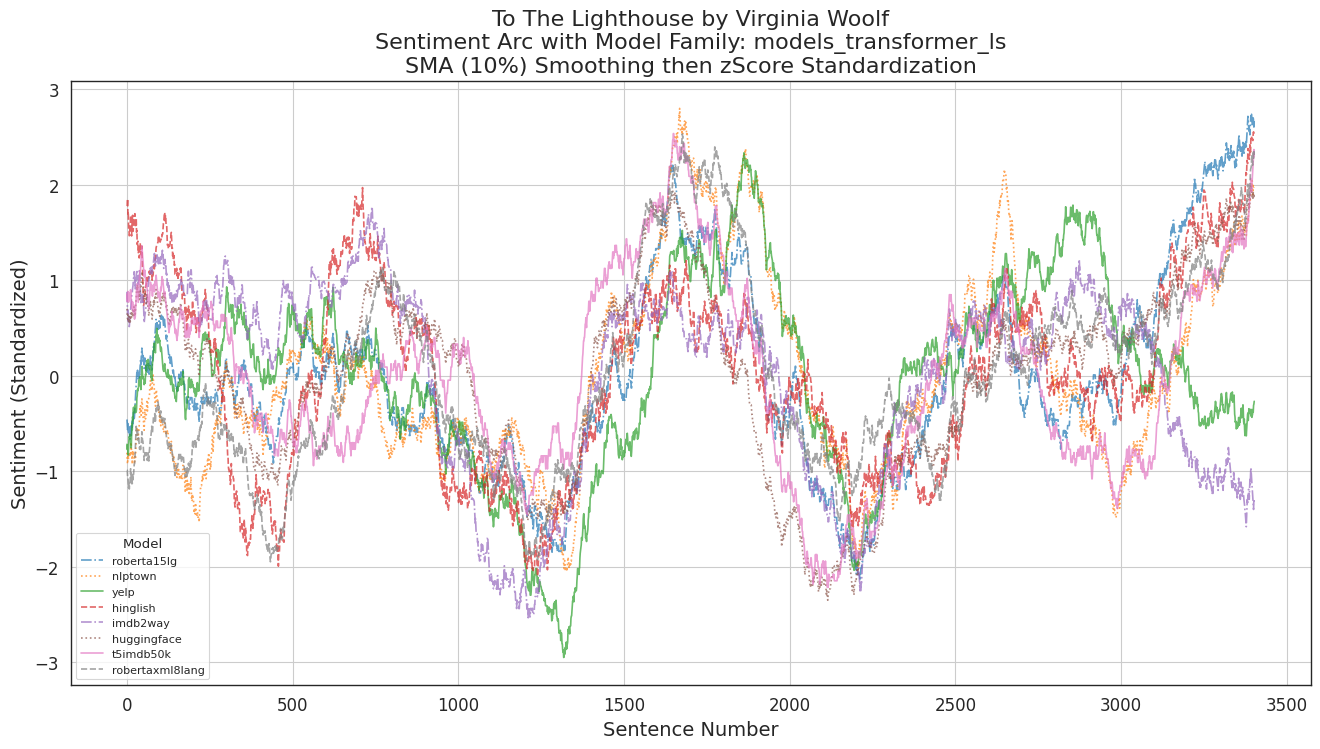

Saved: fig_to_the_lighthouse_by_virginia_woolf_sma10_zscore.png


In [82]:
# Plot

if Standardization_Method == 'zScore':
  scaler = StandardScaler()
elif Standardization_Method == 'MinMax':
  scaler = MinMaxScaler()
elif Standardization_Method == 'Robust':
  scaler = RobustScaler()
else:
  print(f'ERROR: Illegal Standardization_Method: {Standardization_Method}')

temp_df = pd.DataFrame()

for i, amodel in enumerate(globals()[Model_Family]):
  # print(f'Model #{i}: {amodel}')
  if Smoothing_Method == 'SMA':
    amodel_sma = f'{amodel}_sma'
    temp_df[amodel_sma] = novels_all_dt[Novel_Name][amodel].rolling(win_size, center=True, min_periods=0).mean()
    amodel_smastd = f'{amodel}_smastd'
    temp_df[amodel_smastd] = scaler.fit_transform(temp_df[amodel_sma].values.reshape(-1,1))
    _ = temp_df[amodel_smastd].plot(label=amodel, alpha=0.7, style=next(linecycler))

plt.grid(True)
if Smoothing_Method == 'SMA':
  plt.title(f'{Novel_Title}\nSentiment Arc with Model Family: {Model_Family}\n{Smoothing_Method} ({Window_Percent}%) Smoothing then {Standardization_Method} Standardization')
else:
  plt.title(f'{Novel_Title}\nSentiment Arc with Model Family: {Model_Family}\n{Smoothing_Method} ({fraction}) Smoothing then {Standardization_Method} Standardization')
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment (Standardized)')
plt.legend(loc='best', title='Model')

filename_fig = clean_fig_name(f'fig_{Novel_Title}_{Smoothing_Method}{Window_Percent}_{Standardization_Method}')

plt.savefig(f'{plot_dir}{filename_fig}', dpi=300, format='png')
plt.show();

filename_fig_png = f'{filename_fig}.png'
print(f'Saved: {filename_fig_png}')

plt.show();

# Plot Selected Models

In [54]:
novels_all_dt['cdickens_achristmascarol'].head()

,sent_no,fcn,lstm,cnn,multinb,logreg,logreg_cv,rf,xgb,flaml,autogluon,parag_no,sect_no,sent_raw,sent_clean,sentimentr,syuzhet,bing,sentiword,senticnet,nrc,afinn,vader,textblob,pattern,stanza,flair,jockers_rinker,jockers,huliu,lmcd,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang,flair_z,jockers_rinker_z,sentimentr_z,nlptown_z,hinglish_z,multinb_z,pattern_z,autogluon_z,yelp_z,huggingface_z,robertaxml8lang_z,rf_z,flaml_z,fcn_z,cnn_z,huliu_z,vader_z,logreg_z,senticnet_z,jockers_z,logreg_cv_z,nrc_z,lstm_z,syuzhet_z,xgb_z,textblob_z,roberta15lg_z,sentiword_z,afinn_z,t5imdb50k_z,stanza_z,imdb2way_z,bing_z,lmcd_z,median_z
0,0,0.646393,0.088418,0.270089,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,MARLEY'S GHOST,marley own ghost,-0.60,-0.60,0.000000,-0.125000,-0.487,0.000000,-0.834298,-0.3182,0.60,0.541217,2.502894,-0.6499,-0.424264,-0.424264,0.000000,0.000000,-1.962275,0.262373,4.283848,-0.948571,0.561147,0.992263,1.0,1.591256,-0.487251,-1.469818,-0.580200,1.326093,-0.113297,-1.124168,2.456437,0.730747,-1.145981,-0.977287,1.347475,0.220739,0.157824,0.206207,-0.365079,-0.008697,-0.906838,-0.985100,-0.708671,-1.645363,-0.912991,-0.181335,-1.661475,-0.632196,0.173757,2.071486,-0.970336,-0.212868,-0.831996,1.161883,-1.034342,0.566684,-0.028418,0.010733,-0.288974
1,1,0.436485,0.242378,0.295392,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,MARLEY was dead: to begin with.,marley was dead to begin with,-1.00,-1.00,-35.819705,-0.250000,-0.364,0.000000,-1.585825,-0.6486,-0.20,-0.111003,2.643042,-0.9914,-0.408248,-0.408248,-0.408248,0.000000,-1.998168,0.517660,4.405262,-0.992046,0.723058,-0.503880,-1.0,-1.628661,-0.864469,-1.415815,-0.892617,1.400332,0.032434,-1.124168,-0.996457,-1.368463,-0.971975,-1.022725,-1.165685,0.220739,0.157824,-0.675495,-0.259391,-1.249294,-1.650207,-0.985100,-0.630749,-1.587010,-0.912991,-0.181335,-1.166484,-0.963540,0.173757,-1.133721,-0.988399,-0.366147,-1.470524,-0.957379,-0.998416,-1.497172,-1.120313,0.010733,-0.978538
2,2,0.623735,0.365910,0.340280,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0,There is no doubt whatever about that.,there is no doubt whatever about that,-0.75,-0.75,-33.945367,0.750000,0.424,-8.371066,-0.977560,-0.5719,0.00,0.000000,2.932680,-0.8756,0.283473,0.283473,0.377964,0.377964,1.994503,2.355875,2.318999,0.930411,1.542103,0.691824,1.0,0.560936,-0.736557,0.916568,-0.697356,0.124691,0.769633,-1.124168,-0.408802,0.730747,0.280966,0.986550,0.543306,0.220739,0.157824,0.111032,-0.071901,1.139873,-1.477639,-0.985100,-0.131545,0.933271,-0.912991,-0.919090,-0.769322,-0.756450,0.173757,-0.332419,1.020937,0.860082,-0.953717,1.161883,-0.924170,0.152244,-1.063178,2.255130,0.117862
3,3,0.782299,0.995171,0.441127,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,The register of his burial was signed by the c...,the register of his burial was signed by the c...,-1.50,-1.50,-25.704484,-0.125000,1.480,-7.757728,0.000000,-0.3818,0.00,0.000000,6.019318,-0.5650,-0.353553,-0.353553,-0.235702,0.000000,1.997345,3.248865,4.289665,-0.922011,0.923470,0.990550,1.0,0.696814,-0.393471,-1.231392,-1.283139,1.329650,0.212820,0.889547,-0.408802,0.730747,0.889635,-0.949527,0.649359,0.220739,0.157824,0.777068,0.349332,-0.724956,-1.049932,1.015125,0.537439,-1.387729,1.095302,-0.865036,1.253798,-1.377721,0.173757,-0.332419,1.022367,-0.212868,-0.123142,1.161883,-0.132939,0.564321,-0.811970,0.010733,0.165790
4,4,0.911363,0.914850,0.209035,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,Scrooge signed it: and Scrooge's name was good...,scrooge signed it and scrooge own name was goo...,0.75,0.75,25.026702,0.697917,2.210,7.694834,0.969076,0.7269,0.65,0.432507,6.783532,-0.5874,0.172062,0.172062,0.229416,0.229416,1.996548,4.330363,0.295599,0.990661,1.902767,0.996330,1.0,1.526228,-0.418214,0.540905,0.474209,-1.112511,1.094256,0.889547,1.880918,0.730747,1.626792,1.049521,1.296721,0.220739,0.157824,1.319191,-0.620097,0.688459,1.444539,1.015125,0.999900,0.527344,1.095302,0.496823,0.995560,0.486093,0.173757,2.271812,1.021966,0.796216,0.700225,1.161883,0.062960,0.572294,0.734474,1.37

In [63]:
models_all_std_ls = ['Lexicon_Syuzhet',
                     'Lexicon_Bing',
                     'Lexicon_AFINN',
                     'Lexicon_NRC',
                     'Lexicon_Pattern',
                     'Heuristic_SentimentR',
                     'Heuristic_Jockers',
                     'Lexicon_JockersRinker',
                     'Heuristic_HuLiu',
                     'Heuristic_LMcD',
                     'Heuristic_SentiWord',
                     'Heuristic_SenticNet',
                     'Heuristic_VADER',
                     'TradML_LogReg',
                     'TradML_Logreg_CV',
                     'TradML_MultiNB',
                     'TradML_TextBlob',
                     'TradML_RF',
                     'TradML_XGB',
                     'TradML_FLAML',
                     'TradML_AutoGluon',
                     'DNN_FCN',
                     'DNN_LSTN',
                     'DNN_CNN',
                     'DNN_Stanza',
                     'DNN_Flair',
                     'Transformer_RoBERTa15lg',
                     'Transformer_NLPTown',
                     'Transformer_Yelp',
                     'Transformer_Hinglish',
                     'Transformer_IMDB2way',
                     'Transformer_Huggingface',
                     'Transformer_T5IMDB50k',
                     'Transformer_RoBERTaXML8lang']

In [64]:
models_std2col_dt = dict(zip(models_all_std_ls, models_all_ls))
models_std2col_dt

{'DNN_CNN': 'cnn',
 'DNN_FCN': 'fcn',
 'DNN_Flair': 'flair',
 'DNN_LSTN': 'lstn',
 'DNN_Stanza': 'stanza',
 'Heuristic_HuLiu': 'huliu',
 'Heuristic_Jockers': 'jockers',
 'Heuristic_LMcD': 'lmcd',
 'Heuristic_SentiWord': 'sentiword',
 'Heuristic_SenticNet': 'senticnet',
 'Heuristic_SentimentR': 'sentimentr',
 'Heuristic_VADER': 'vader',
 'Lexicon_AFINN': 'afinn',
 'Lexicon_Bing': 'bing',
 'Lexicon_JockersRinker': 'jockers_rinker',
 'Lexicon_NRC': 'nrc',
 'Lexicon_Pattern': 'pattern',
 'Lexicon_Syuzhet': 'syuzhet',
 'TradML_AutoGluon': 'autogluon',
 'TradML_FLAML': 'flaml',
 'TradML_LogReg': 'logreg',
 'TradML_Logreg_CV': 'logreg_cv',
 'TradML_MultiNB': 'multinb',
 'TradML_RF': 'rf',
 'TradML_TextBlob': 'textblob',
 'TradML_XGB': 'xgb',
 'Transformer_Hinglish': 'hinglish',
 'Transformer_Huggingface': 'huggingface',
 'Transformer_IMDB2way': 'imdb2way',
 'Transformer_NLPTown': 'nlptown',
 'Transformer_RoBERTa15lg': 'roberta15lg',
 'Transformer_RoBERTaXML8lang': 'robertaxml8lang',
 'Transfo

In [73]:
#@title Select Which Models to Directly Compare:

#@markdown Lexicon Models
Lexicon_Syuzhet = True #@param {type:"boolean"}
Lexicon_Bing = False #@param {type:"boolean"}
Lexicon_AFINN = False #@param {type:"boolean"}
Lexicon_NRC = True #@param {type:"boolean"}
Lexicon_JockersRinker = False #@param {type:"boolean"}
Lexicon_Pattern = True #@param {type:"boolean"}

#@markdown Heuristic Models
Heuristic_VADER = True #@param {type:"boolean"}
Heuristic_SentimentR = True #@param {type:"boolean"}
Heuristic_Jockers = False #@param {type:"boolean"}
Heuristic_HuLiu = False #@param {type:"boolean"}
Heuristic_SentiWord = False #@param {type:"boolean"}
Heuristic_SenticNet = False #@param {type:"boolean"}
Heuristic_LMcD = False #@param {type:"boolean"}

#@markdown Traditional ML Models
TradML_LogReg = True #@param {type:"boolean"}
TradML_Logreg_CV = False #@param {type:"boolean"}
TradML_MultiNB = False #@param {type:"boolean"}
TradML_RF = True #@param {type:"boolean"}
TradML_XGB = True #@param {type:"boolean"}
TradML_TextBlob = True #@param {type:"boolean"}
TradML_FLAML = True #@param {type:"boolean"}
TradML_AutoGluon = True #@param {type:"boolean"}

#@markdown DNN Models
DNN_FCN = False #@param {type:"boolean"}
DNN_LSTN = False #@param {type:"boolean"}
DNN_CNN = True #@param {type:"boolean"}
DNN_Stanza = True #@param {type:"boolean"}
DNN_Flair = True #@param {type:"boolean"}

#@markdown Transformer Models
Transformer_RoBERTa15lg = True #@param {type:"boolean"}
Transformer_NLPTown = True #@param {type:"boolean"}
Transformer_Huggingface = True #@param {type:"boolean"}
Transformer_Yelp = True #@param {type:"boolean"}
Transformer_IMDB2way = False #@param {type:"boolean"}
Transformer_RoBERTaXML8lang = False #@param {type:"boolean"}
Transformer_T5IMDB50k = False #@param {type:"boolean"}
Transformer_Hinglish = False #@param {type:"boolean"}


In [74]:
models_selected_ls = []

if Lexicon_Syuzhet: 
  models_selected_ls.append('syuzhet')

if Lexicon_AFINN:
  models_selected_ls.append('afinn')

if Lexicon_Bing:
  models_selected_ls.append('bing')

if Lexicon_JockersRinker:
  models_selected_ls.append('jockersrinker')

if Lexicon_NRC:
  models_selected_ls.append('nrc')

if Lexicon_Pattern:
  models_selected_ls.append('pattern')




if Heuristic_SentimentR:
  models_selected_ls.append('sentimentr')

if Heuristic_VADER:
  models_selected_ls.append('vader')

if Heuristic_HuLiu:
  models_selected_ls.append('huliu')

if Heuristic_Jockers:
  models_selected_ls.append('jockers')

if Heuristic_LMcD:
  models_selected_ls.append('lmcd')

if Heuristic_SentiWord:
  models_selected_ls.append('sentiword')

if Heuristic_SenticNet:
  models_selected_ls.append('senticnet')



if TradML_AutoGluon:
  models_selected_ls.append('autogluon')

if TradML_FLAML:
  models_selected_ls.append('flaml')

if TradML_LogReg:
  models_selected_ls.append('logreg')

if TradML_Logreg_CV:
  models_selected_ls.append('logreg_cv')

if TradML_MultiNB:
  models_selected_ls.append('multinb')

if TradML_RF:
  models_selected_ls.append('rf')

if TradML_TextBlob:
  models_selected_ls.append('textblob')

if TradML_XGB:
  models_selected_ls.append('xgb')



if DNN_CNN: 
  models_selected_ls.append('cnn')

if DNN_FCN:
  models_selected_ls.append('fcn')

if DNN_Flair:
  models_selected_ls.append('flair')

if DNN_LSTN:
  models_selected_ls.append('lstn')

if DNN_Stanza:
  models_selected_ls.append('stanza')



if Transformer_Hinglish:
  models_selected_ls.append('hinglish')

if Transformer_Huggingface:
  models_selected_ls.append('huggingface')

if Transformer_IMDB2way:
  models_selected_ls.append('imdb2way')

if Transformer_NLPTown:
  models_selected_ls.append('nlptown')

if Transformer_RoBERTa15lg:
  models_selected_ls.append('roberta15lg')

if Transformer_RoBERTaXML8lang:
  models_selected_ls.append('robertaxml8lang')

if Transformer_T5IMDB50k:
  models_selected_ls.append('t5imdb50k')

if Transformer_Yelp:
  models_selected_ls.append('yelp')

print(f'{models_selected_ls}\n\nThere were {len(models_selected_ls)} Models Selected (+1 Median)')

['syuzhet', 'nrc', 'pattern', 'sentimentr', 'vader', 'autogluon', 'flaml', 'logreg', 'rf', 'textblob', 'xgb', 'cnn', 'flair', 'stanza', 'huggingface', 'nlptown', 'roberta15lg', 'yelp']

There were 18 Models Selected (+1 Median)


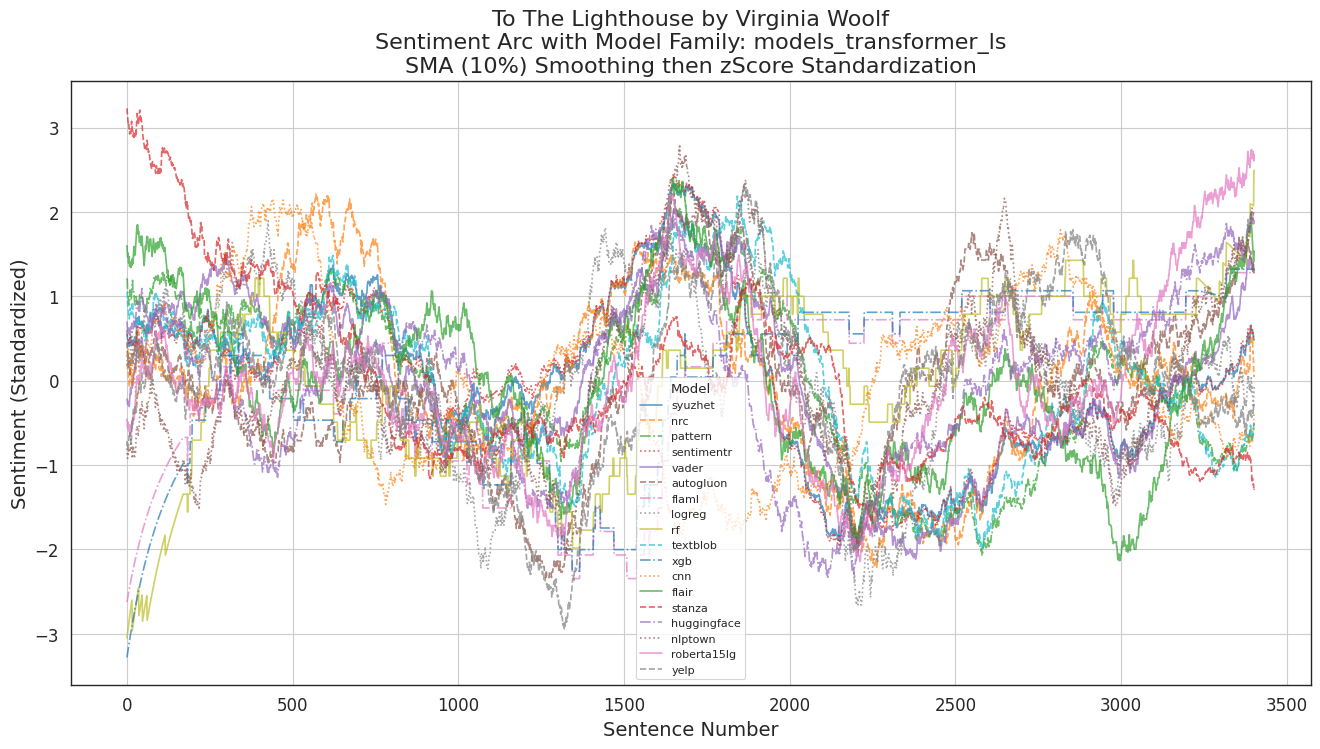

Saved: fig_to_the_lighthouse_by_virginia_woolf_selected_sma10_zscore.png


In [81]:
# Plot

if Standardization_Method == 'zScore':
  scaler = StandardScaler()
elif Standardization_Method == 'MinMax':
  scaler = MinMaxScaler()
elif Standardization_Method == 'Robust':
  scaler = RobustScaler()
else:
  print(f'ERROR: Illegal Standardization_Method: {Standardization_Method}')


from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

temp_df = pd.DataFrame()

for i, amodel in enumerate(models_selected_ls):
  # print(f'Model #{i}: {amodel}')
  if Smoothing_Method == 'SMA':
    amodel_sma = f'{amodel}_sma'
    temp_df[amodel_sma] = novels_all_dt[Novel_Name][amodel].rolling(win_size, center=True, min_periods=0).mean()
    amodel_smastd = f'{amodel}_smastd'
    temp_df[amodel_smastd] = scaler.fit_transform(temp_df[amodel_sma].values.reshape(-1,1))
    _ = temp_df[amodel_smastd].plot(label=amodel, alpha=0.7, style=next(linecycler))

plt.grid(True)
if Smoothing_Method == 'SMA':
  plt.title(f'{Novel_Title}\nSentiment Arc with Model Family: {Model_Family}\n{Smoothing_Method} ({Window_Percent}%) Smoothing then {Standardization_Method} Standardization')
else:
  plt.title(f'{Novel_Title}\nSentiment Arc with Model Family: {Model_Family}\n{Smoothing_Method} ({fraction}) Smoothing then {Standardization_Method} Standardization')
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment (Standardized)')
plt.legend(loc='best', title='Model')

filename_fig = clean_fig_name(f'fig_{Novel_Title}_selected_{Smoothing_Method}{Window_Percent}_{Standardization_Method}')

plt.savefig(f'{plot_dir}{filename_fig}', dpi=300, format='png')
plt.show();

filename_fig_png = f'{filename_fig}.png'
print(f'Saved: {filename_fig_png}')

plt.show();